In [1]:
import numpy as np

import sys
sys.path.append('../../src/phloemfinder/')

from metabolome_analysis import MetaboliteAnalysis

In [72]:
metabolome = MetaboliteAnalysis(
    metabolome_csv="./feature_data_unfiltered.csv",
    metabolome_feature_id_col="feature_id")

metabolome.validate_input_metabolome_df()

print("Number of total features before filtering = {0}".format(metabolome.metabolome.shape[0]))

Metabolome input data validated.
Number of total features before filtering = 1300


<Figure size 640x480 with 0 Axes>

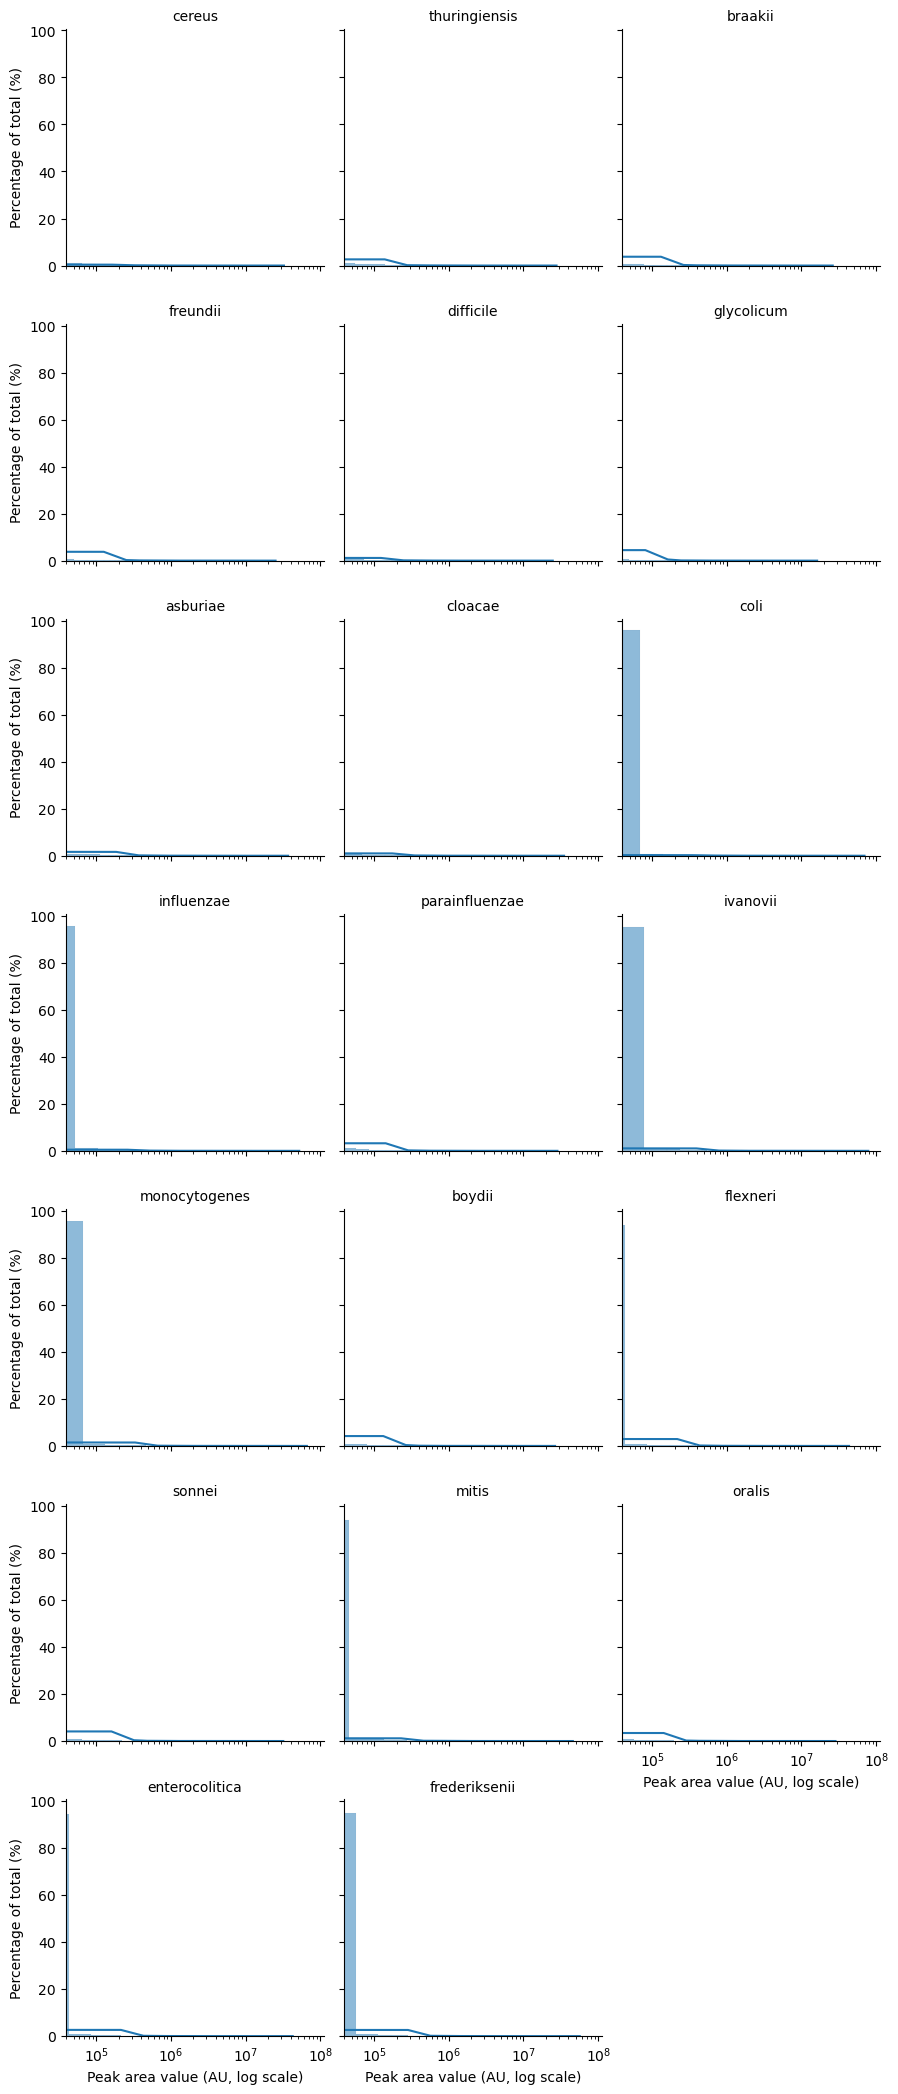

In [46]:
metabolome.create_density_plot()

In [74]:
metabolome.filter_out_unreliable_features(nb_times_detected=11)
print("number of total features after unreliable feature filtering = {0}".format(metabolome.metabolome.shape[0]))

number of total features after unreliable feature filtering = 599


In [75]:
metabolome.write_clean_metabolome_to_csv(path_of_cleaned_csv="./filtered_features.csv")

In [76]:
metabolome.compute_pca_on_metabolites(n_principal_components=10)
metabolome.pca_performed


True

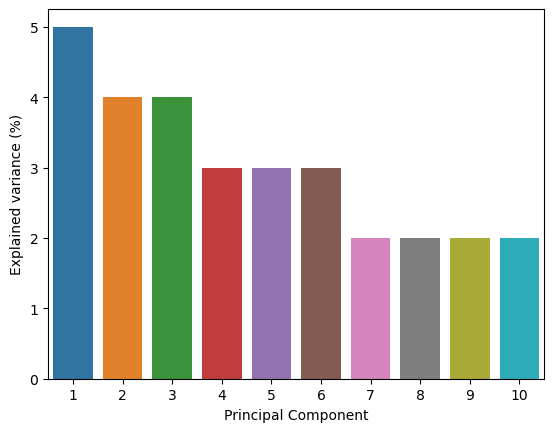

In [77]:
metabolome.create_scree_plot()

In [78]:
metabolome.metabolome_pca_reduced.shape

(571, 10)

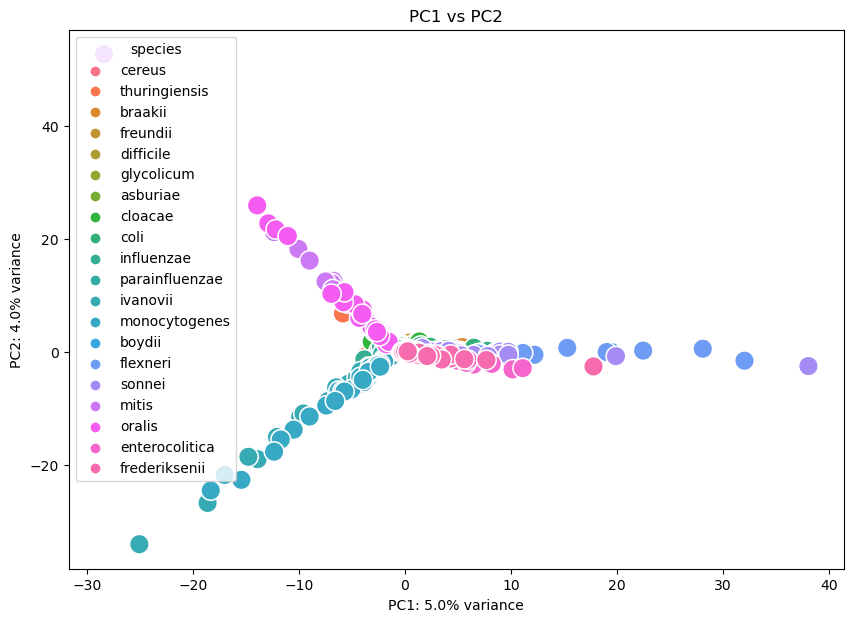

In [79]:
metabolome.create_sample_score_plot(
    pc_x_axis=1,
    pc_y_axis=2,
    name_grouping_var='species')

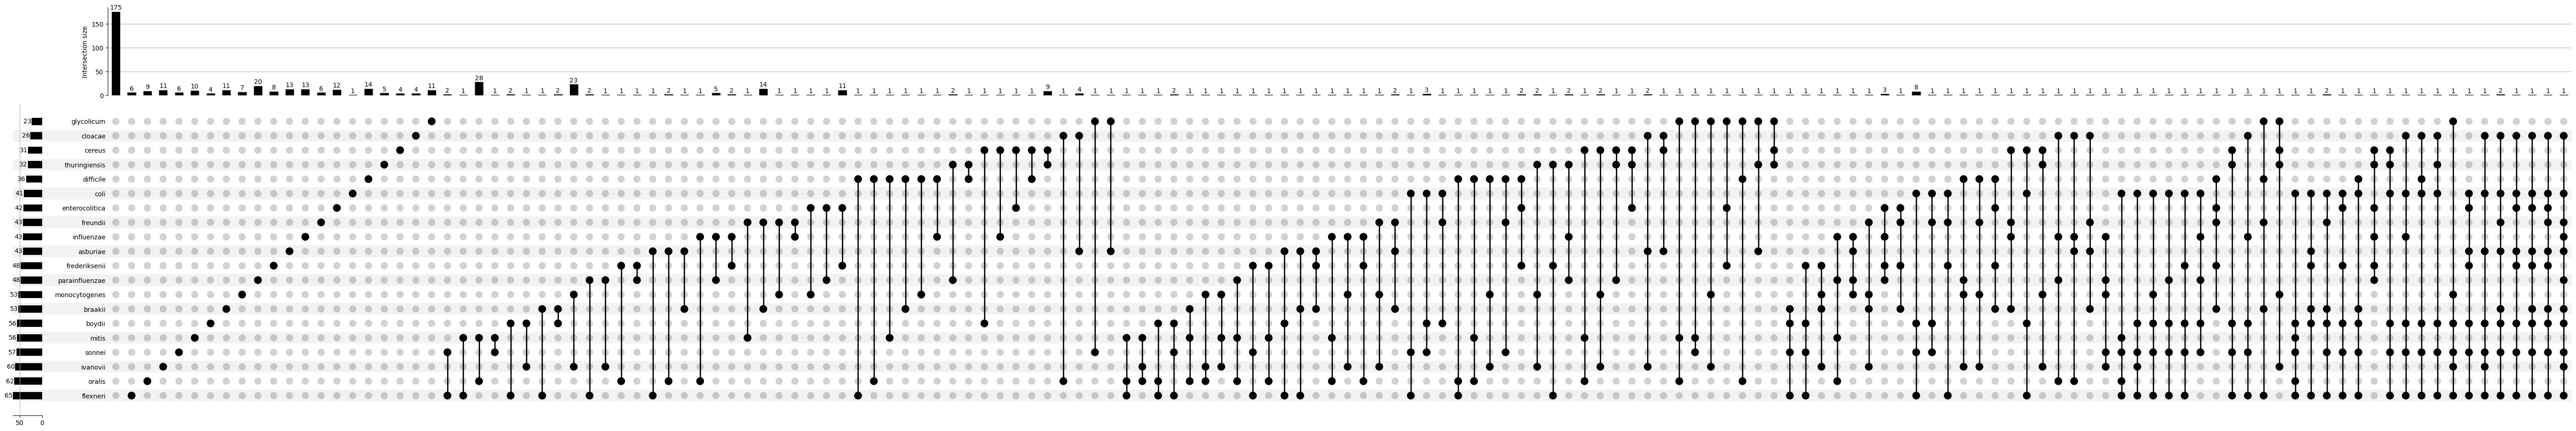

In [80]:
metabolome.plot_features_in_upset_plot()